<a href="https://colab.research.google.com/github/victorparedes178/Proyecto-Analisis-de-Tiendas--Alura-/blob/main/Proyecto_Analisis_Tiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



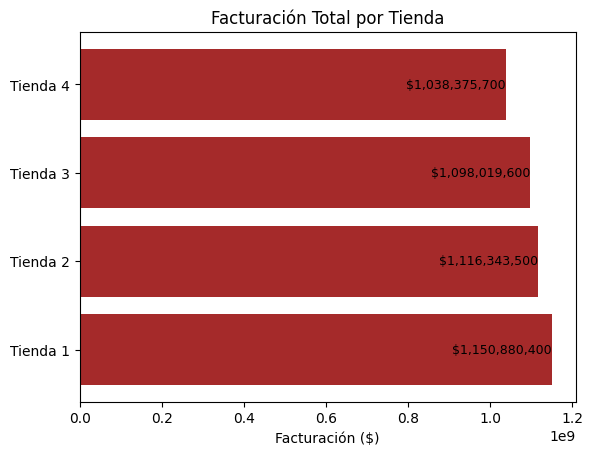

In [ ]:
facturacion_t1 = sum(tienda['Precio'])
facturacion_t2 = sum(tienda2['Precio'])
facturacion_t3 = sum(tienda3['Precio'])
facturacion_t4 = sum(tienda4['Precio'])

import matplotlib.pyplot as plt

facturaciones = [facturacion_t1, facturacion_t2, facturacion_t3, facturacion_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.barh(tiendas, facturaciones, color='Brown')
plt.xlabel('Facturación ($)')
plt.title('Facturación Total por Tienda')

for i, v in enumerate(facturaciones):
    plt.text(v, i, f'${v:,.0f}', va='center', ha='right', fontsize=9)

plt.show()

# 2. Ventas por categoría

In [ ]:
ventas_categorias_tienda = Counter(tienda['Categoría del Producto']).most_common()[::-1]
ventas_categorias_tienda2 = Counter(tienda2['Categoría del Producto']).most_common()[::-1]
ventas_categorias_tienda3 = Counter(tienda3['Categoría del Producto']).most_common()[::-1]
ventas_categorias_tienda4 = Counter(tienda4['Categoría del Producto']).most_common()[::-1]

ventas_categorias_tienda_df = pd.DataFrame(ventas_categorias_tienda, columns=['Categoría del Producto', 'Vendidos'])
ventas_categorias_tienda2_df = pd.DataFrame(ventas_categorias_tienda2, columns=['Categoría del Producto', 'Vendidos'])
ventas_categorias_tienda3_df = pd.DataFrame(ventas_categorias_tienda3, columns=['Categoría del Producto', 'Vendidos'])
ventas_categorias_tienda4_df = pd.DataFrame(ventas_categorias_tienda4, columns=['Categoría del Producto', 'Vendidos'])

<Axes: title={'center': 'Tienda 4 - Ventas por Categoría'}, ylabel='Categoría del Producto'>

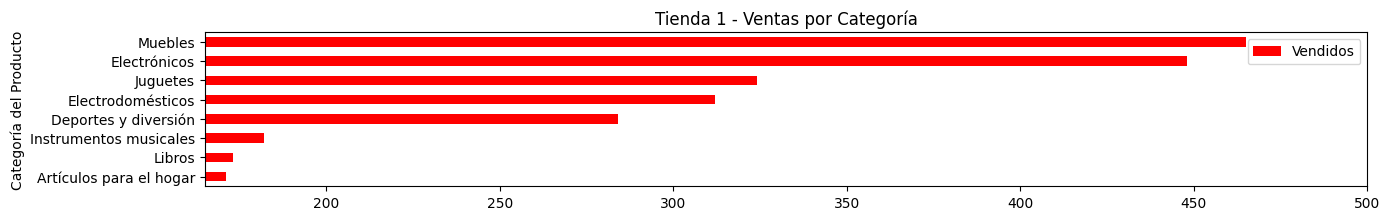

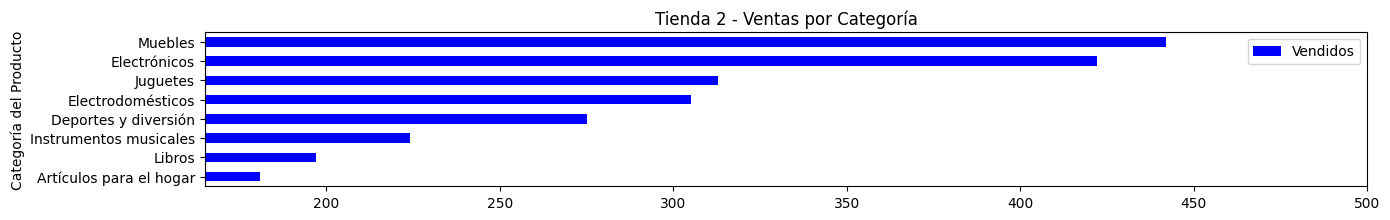

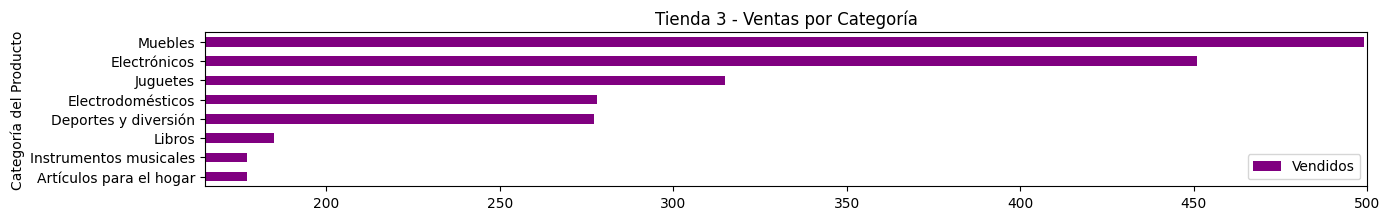

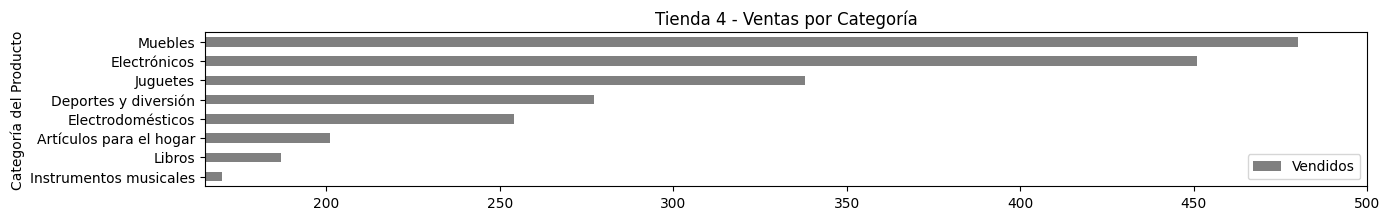

In [ ]:
ventas_categorias_tienda_df.plot(kind='barh', x='Categoría del Producto', y='Vendidos',figsize=(15, 2), color='red', title='Tienda 1 - Ventas por Categoría', xlim=(165, 500))
ventas_categorias_tienda2_df.plot(kind='barh', x='Categoría del Producto', y='Vendidos', figsize=(15, 2), color='blue', title='Tienda 2 - Ventas por Categoría', xlim=(165, 500))
ventas_categorias_tienda3_df.plot(kind='barh', x='Categoría del Producto', y='Vendidos', figsize=(15, 2), color='purple', title='Tienda 3 - Ventas por Categoría', xlim=(165, 500))
ventas_categorias_tienda4_df.plot(kind='barh', x='Categoría del Producto', y='Vendidos', figsize=(15, 2), color='grey', title='Tienda 4 - Ventas por Categoría', xlim=(165, 500))

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_t1 = tienda['Calificación'].mean()
calificacion_t2 = tienda2['Calificación'].mean()
calificacion_t3 = tienda3['Calificación'].mean()
calificacion_t4 = tienda4['Calificación'].mean()

calificaciones_promedio = [calificacion_t1, calificacion_t2, calificacion_t3, calificacion_t4]

calificaciones_promedio_pd = pd.DataFrame(calificaciones_promedio, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], columns=['Calificación Promedio'])

<Axes: title={'center': 'Calificación Promedio por Tienda'}>

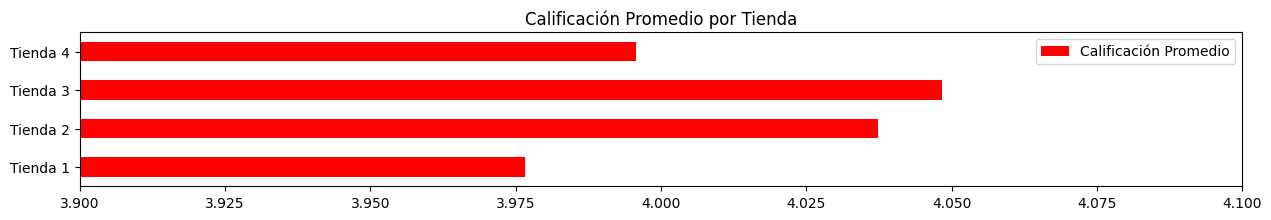

In [ ]:
calificaciones_promedio_pd.plot(kind='barh', figsize=(15,2), color='red', title='Calificación Promedio por Tienda', xlim=(3.9, 4.1))

# 4. Productos más y menos vendidos

In [ ]:
from typing import Counter

producto_mas_vendido_tienda = Counter(tienda['Producto']).most_common()[::-1]
producto_mas_vendido_tienda2 = Counter(tienda2['Producto']).most_common()[::-1]
producto_mas_vendido_tienda3 = Counter(tienda3['Producto']).most_common()[::-1]
producto_mas_vendido_tienda4 = Counter(tienda4['Producto']).most_common()[::-1]

producto_mas_vendido_tienda_df = pd.DataFrame(producto_mas_vendido_tienda, columns=['Producto', 'Vendidos'])
producto_mas_vendido_tienda2_df = pd.DataFrame(producto_mas_vendido_tienda2, columns=['Producto', 'Vendidos'])
producto_mas_vendido_tienda3_df = pd.DataFrame(producto_mas_vendido_tienda3, columns=['Producto', 'Vendidos'])
producto_mas_vendido_tienda4_df = pd.DataFrame(producto_mas_vendido_tienda4, columns=['Producto', 'Vendidos'])

<Axes: title={'center': 'Tienda 4 - Productos Mas Vendidos'}, ylabel='Producto'>

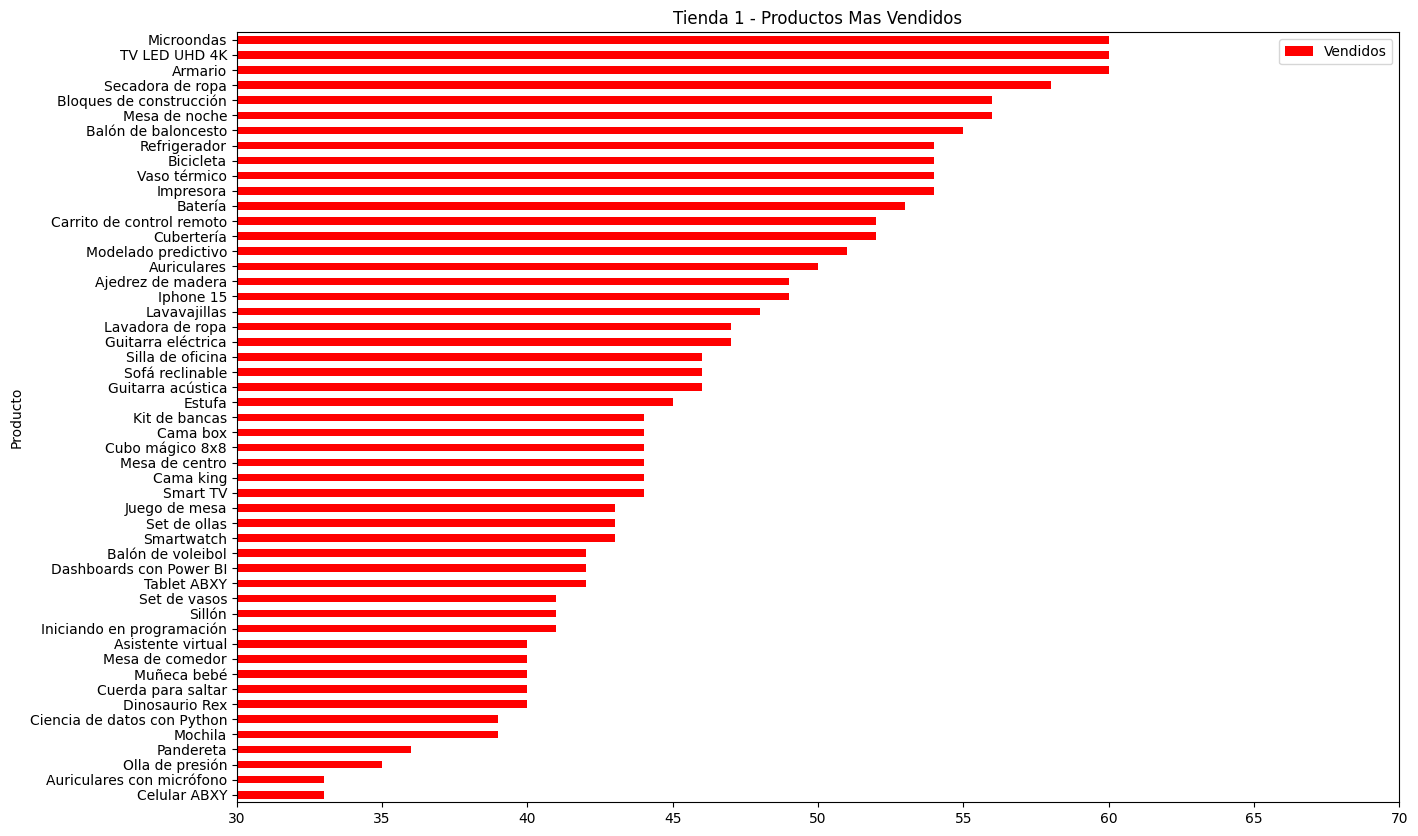

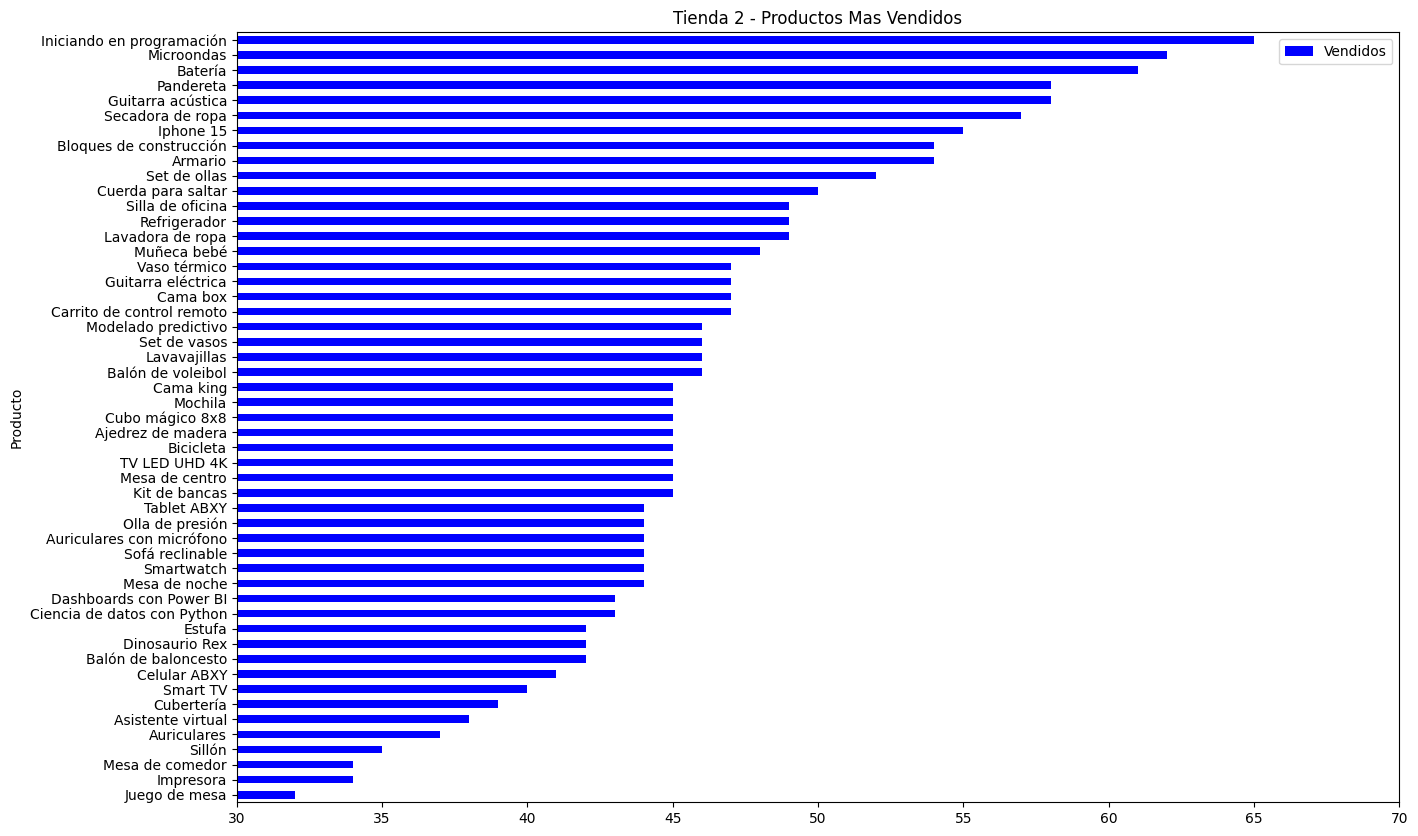

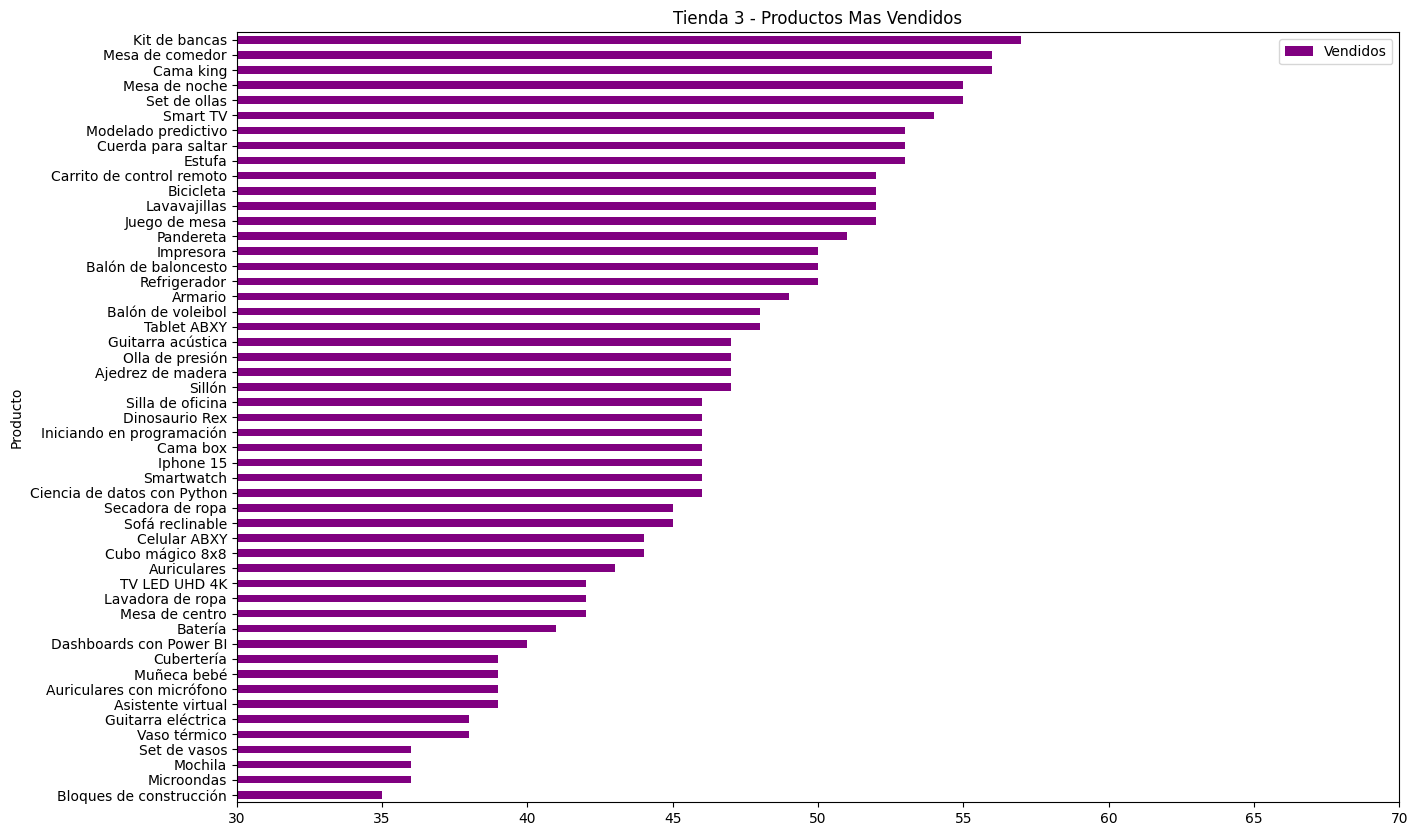

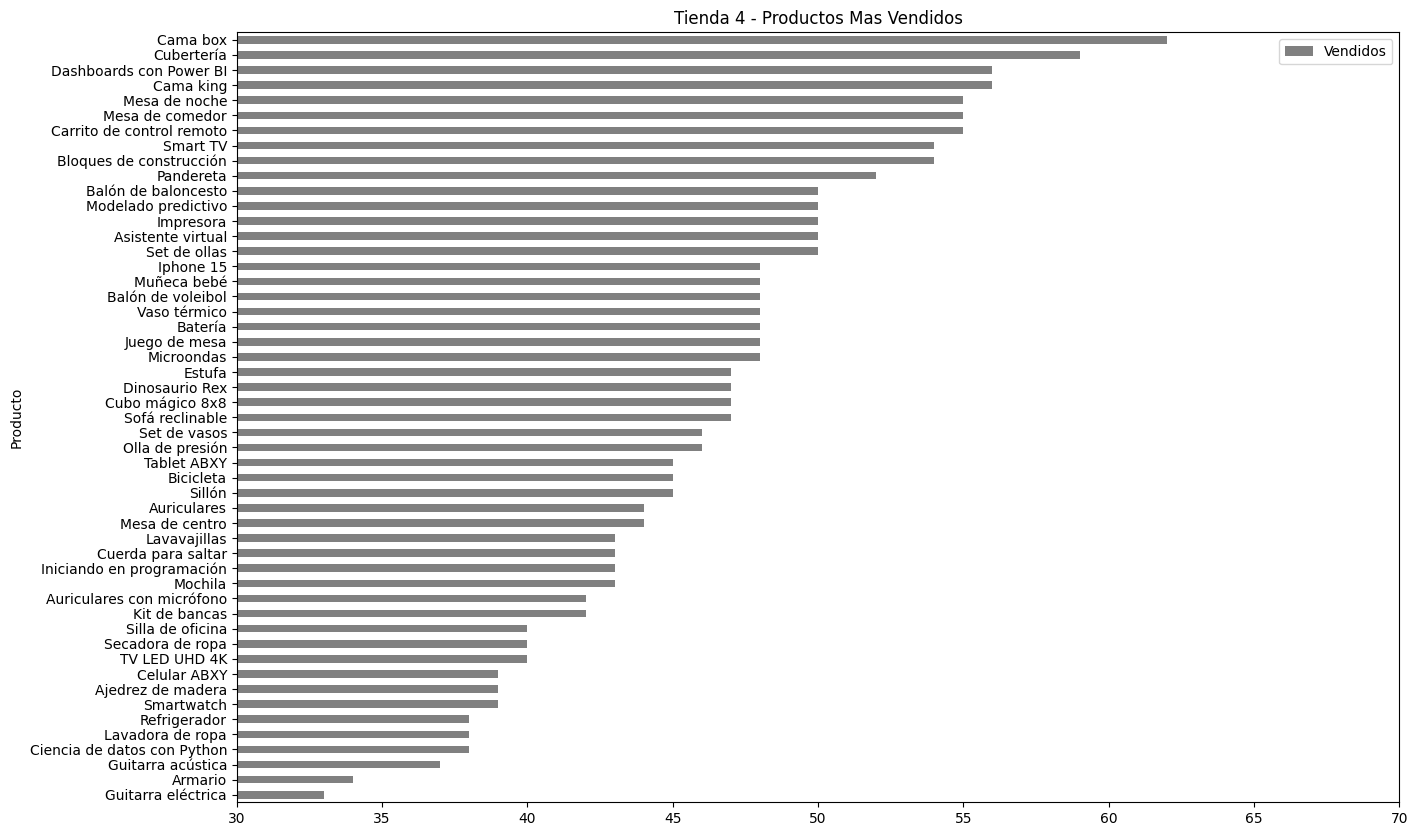

In [ ]:
producto_mas_vendido_tienda_df.plot(kind='barh', x='Producto', y='Vendidos', figsize=(15, 10), color='red', title='Tienda 1 - Productos Mas Vendidos', xlim=(30, 70))
producto_mas_vendido_tienda2_df.plot(kind='barh', x='Producto', y='Vendidos', figsize=(15, 10), color='blue', title='Tienda 2 - Productos Mas Vendidos' , xlim=(30, 70))
producto_mas_vendido_tienda3_df.plot(kind='barh', x='Producto', y='Vendidos', figsize=(15, 10), color='purple', title='Tienda 3 - Productos Mas Vendidos' , xlim=(30, 70))
producto_mas_vendido_tienda4_df.plot(kind='barh', x='Producto', y='Vendidos', figsize=(15, 10), color='grey', title='Tienda 4 - Productos Mas Vendidos' , xlim=(30, 70))

# 5. Envío promedio por tienda

In [ ]:
envio_promedio_t1 = tienda[['Costo de envío']].mean()
envio_promedio_t2 = tienda2[['Costo de envío']].mean()
envio_promedio_t3 = tienda3[['Costo de envío']].mean()
envio_promedio_t4 = tienda4[['Costo de envío']].mean()

promedios_df = [envio_promedio_t1, envio_promedio_t2, envio_promedio_t3, envio_promedio_t4]

promedio_envios = pd.DataFrame(promedios_df , index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']).rename(columns={'Costo de envío': 'Gasto Promedio de Envios'})


<Axes: title={'center': 'Promedio de Costo de Envio'}>

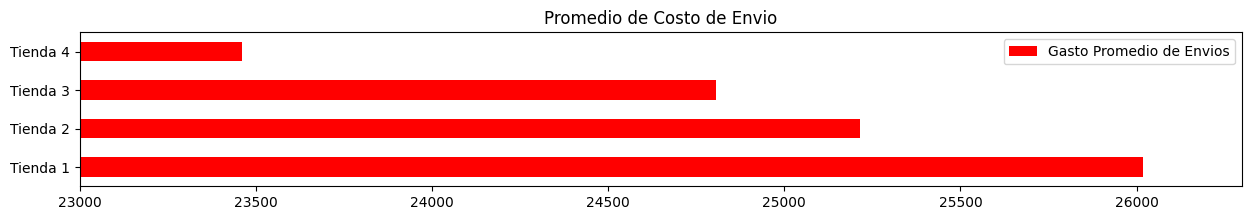

In [ ]:
promedio_envios.plot(kind='barh', figsize=(15,2), color='red', title='Promedio de Costo de Envio' , xlim=(23000, 26300))